In [8]:
import cv2 as cv
import numpy as np
import PIL
from math import pi, ceil, floor
import math
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import skimage.io
from scipy import ndimage as ndi
from statistics import mean

print("Done")

Done


In [14]:
def do_image(original, thresh_lo, thresh_hi, erode_val, gauss_val, exponent, gauss_val2, R, G, B):
    # original = cv.cvtColor(cv.imread("download.png"), cv.COLOR_BGR2RGB)
    r_channel, g_channel, b_channel = cv.split(original)
    color_channels = [r_channel, g_channel, b_channel]
    alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 50 #creating a dummy alpha channel image.
    default_vals = [R, G, B]
    
    # fig, axs = plt.subplots(ncols = 3, figsize=(15, 15))
    
    border_int = 3
    img = cv.copyMakeBorder(cv.cvtColor(original, cv.COLOR_BGR2GRAY), border_int, border_int, border_int, border_int, cv.BORDER_CONSTANT, value=255)
    # axs[0].imshow(original)
    
    ret, thresh = cv.threshold(img, thresh_lo, thresh_hi, cv.THRESH_BINARY)
    dist = cv.distanceTransform(thresh, cv.DIST_L2, cv.DIST_MASK_PRECISE)
    dist = cv.GaussianBlur(dist, (gauss_val, gauss_val), 0)
    dist = dist[border_int:img.shape[0]-border_int, border_int:img.shape[1]-border_int]
    norm_dist = cv.normalize(dist, None, 0, 1.0, cv.NORM_MINMAX)
    # axs[1].imshow(norm_dist)
    alpha_channel = cv.bitwise_not((255 * norm_dist).astype(b_channel.dtype))
    
    kernel = np.ones((erode_val, erode_val), np.uint8)
    alpha_channel = cv.erode(alpha_channel, kernel)
    
    # axs[2].imshow(img_BGRA)
    
#     alpha_mult_temp = np.zeros_like(color_channels, dtype=float)
#     alpha_mult = np.zeros_like(alpha_channel, dtype=float)

#     for row in range(np.shape(color_channels)[1]):
#         for col in range(np.shape(color_channels)[2]):
#             for chan in range(np.shape(color_channels)[0]):
#                 alpha_mult_temp[chan][row][col] = pow(abs(int(color_channels[chan][row][col])-default_vals[chan])/default_vals[chan], exponent) * 5
#                 if chan % 3 == 2:
#                     if mean(alpha_mult_temp[..., row, col]) > 1:
#                         alpha_channel[row][col] = alpha_channel[row][col] * 1.0
#                     else:
#                         alpha_channel[row][col] = alpha_channel[row][col] * mean(alpha_mult_temp[..., row, col])
    
#     alpha_channel = cv.GaussianBlur(alpha_channel, (gauss_val2, gauss_val2), 0)
    img_BGRA = cv.merge((r_channel, g_channel, b_channel, alpha_channel))
    
    return img_BGRA, alpha_channel

print("Done")

Done


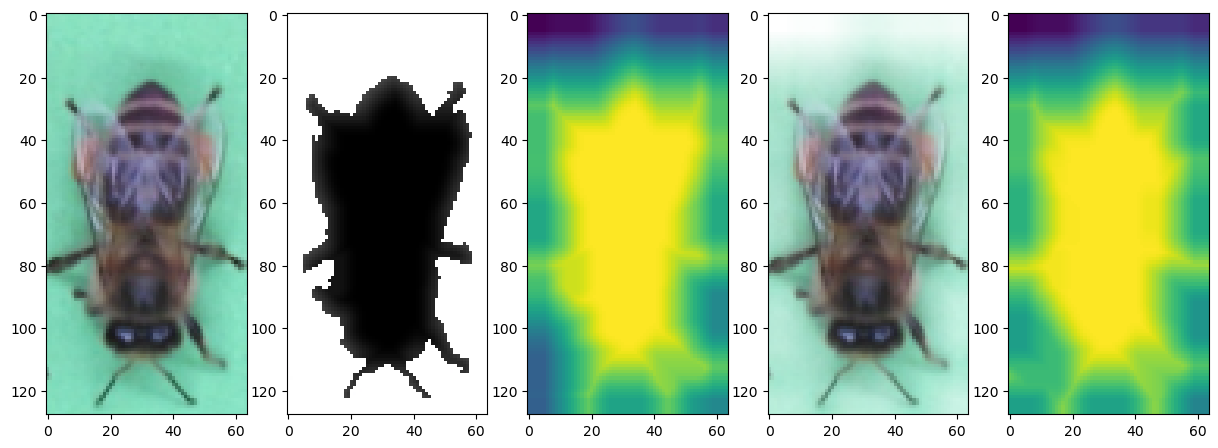

In [15]:
# starting parameters
thresh_lo = 157
thresh_hi = 200
erode_val = 10
gauss_val = 9
exponent = 0.18
gauss_val2 = 3
R = 135
G = 226
B = 192

img = cv.cvtColor(cv.imread("download.png"), cv.COLOR_BGR2RGB)
img2 = cv.bitwise_not(cv.imread("download2.png"))
best_params = [thresh_lo, thresh_hi, erode_val, gauss_val, exponent, gauss_val2, R, G, B]
 
compare_img, start_markers2 = do_image(img2, *best_params)
original_img, markers = do_image(img, *best_params)
fig, axs = plt.subplots(ncols = 5, figsize=(15, 15))
axs[0].imshow(img)
axs[1].imshow(compare_img)
axs[2].imshow(start_markers2)
axs[3].imshow(original_img)
axs[4].imshow(markers)